## Задача
Мы рассмотрим бизнес-модель компании, а также проанализируем источники дохода, чтобы оценить текущие показатели юнит-экономики и предложить меры по их оптимизации.

MarketPro — это маркетплейс, специализирующийся на продаже различных товаров через свою веб-платформу.

В его бизнес-модели присутствуют три основных источника дохода:

- комиссия с продавцов за каждую продажу;
- плата за продвижение товаров на платформе;
- абонентская плата за подписку на расширенные функции для продавцов.

Несмотря на рост числа пользователей и продавцов на платформе, компания сталкивается с уменьшением рентабельности и ростом затрат на привлечение клиентов.

Наша задача – оценить текущие показатели юнит-экономики и предложить оптимизационные меры.

In [2]:
import pandas as pd

# Предположим, что файл называется 'data.csv' и находится в корневой директории
# Замените 'data.csv' на реальное имя вашего файла, если оно отличается
try:
    df = pd.read_csv('/content/drive/MyDrive/ZEROCODER_Блок_курса_Метрики/9 Урок финальный/Таблица по продавцам/seller_data - seller_data.csv')
    print("Данные успешно загружены.")
    print(df.head()) # Выводим первые 5 строк для проверки
except FileNotFoundError:
    print("Ошибка: Файл 'data.csv' не найден. Пожалуйста, убедитесь, что файл находится в правильной директории и имя файла указано верно.")
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")

Данные успешно загружены.
   Seller_ID  Order_Value  Commission_Rate  Promotion_Used  Subscription  \
0          1  2248.357077         0.086699            True         False   
1          2  1930.867849         0.084183            True          True   
2          3  2323.844269         0.105457            True         False   
3          4  2761.514928         0.108259            True         False   
4          5  1882.923313         0.081263           False         False   

   Promotion_Income  Subscription_Income  
0              5000                    0  
1              5000                 3000  
2              5000                    0  
3              5000                    0  
4                 0                    0  


# Задача
Проанализировать юнит-экономику продавцов на платформе MarketPro на основе предоставленных данных и рассчитать следующие метрики:

- средний чек с продажи,
- средняя комиссия с продажи,
- средний доход продавца, процент продавцов, использующих платные инструменты продвижения, и процент продавцов, использующих платные подписки.

Для анализа использовать предоставленные данные из файла "marketpro_seller_data.csv".

## Расчет метрик по продажам

### Subtask:
Рассчитать средний чек с каждой продажи и среднюю комиссию с каждой продажи на основе данных из столбцов `Order_Value` и `Commission_Rate`.


**Обоснование**:

 Подзадача требует рассчитать среднюю стоимость заказа и среднюю комиссию за продажу.

 Оба значения можно рассчитать, используя существующий фрейм данных `df`, и сохранить в указанных переменных.



In [3]:
average_order_value = df['Order_Value'].mean()
average_commission_per_sale = (df['Order_Value'] * df['Commission_Rate']).mean()

print(f"Средний чек с каждой продажи: {average_order_value:.2f}")
print(f"Средняя комиссия с каждой продажи: {average_commission_per_sale:.2f}")

Средний чек с каждой продажи: 2009.67
Средняя комиссия с каждой продажи: 201.39


## Расчет среднего дохода продавца

### Subtask:
Рассчитать средний доход продавца, учитывая комиссию с продаж, доход от продвижения (`Promotion_Income`) и доход от подписки (`Subscription_Income`).


**Reasoning**:
Create the `Commission_Income` and `Total_Seller_Income` columns, calculate the average total seller income, and print the result.



In [4]:
df['Commission_Income'] = df['Order_Value'] * df['Commission_Rate']
df['Total_Seller_Income'] = df['Commission_Income'] + df['Promotion_Income'] + df['Subscription_Income']
average_total_seller_income = df['Total_Seller_Income'].mean()
print(f"Средний доход продавца: {average_total_seller_income:.2f}")

Средний доход продавца: 3338.39


## Анализ использования платных инструментов

### Subtask:
Рассчитать процент продавцов, использующих платные инструменты продвижения (`Promotion_Used`), и процент продавцов, использующих платную подписку (`Subscription`).


**Reasoning**:
Calculate the percentage of sellers using paid promotion tools and paid subscriptions, then print the results.



In [5]:
promotion_users_percentage = (df['Promotion_Used'].sum() / len(df)) * 100
subscription_users_percentage = (df['Subscription'].sum() / len(df)) * 100

print(f"Процент продавцов, использующих платные инструменты продвижения: {promotion_users_percentage:.2f}%")
print(f"Процент продавцов, использующих платную подписку: {subscription_users_percentage:.2f}%")

Процент продавцов, использующих платные инструменты продвижения: 50.80%
Процент продавцов, использующих платную подписку: 19.90%


## Обобщение результатов

### Subtask:
Собрать все рассчитанные метрики и представить их в удобном для анализа формате.


**Reasoning**:
Collect the calculated metrics into a dictionary and display them in a readable format.



In [7]:
metrics = {
    'Средний чек с продажи': average_order_value,
    'Средняя комиссия с продажи': average_commission_per_sale,
    'Средний доход продавца': average_total_seller_income,
    'Процент использования продвижения': promotion_users_percentage,
    'Процент использования подписки': subscription_users_percentage,
    'Процент комиссии от среднего чека': (average_commission_per_sale / average_order_value) * 100
}

for metric, value in metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.2f}")
    else:
        print(f"{metric}: {value}")

Средний чек с продажи: 2009.67
Средняя комиссия с продажи: 201.39
Средний доход продавца: 3338.39
Процент использования продвижения: 50.80
Процент использования подписки: 19.90
Процент комиссии от среднего чека: 10.02


## Резюме:

### Основные выводы анализа данных

* Средняя стоимость заказа на продажу составляет приблизительно \$2009.67.
* Средняя комиссия за продажу составляет приблизительно \$201.39.
 * Средний общий доход продавца составляет приблизительно \$3338.39, что включает в себя комиссию, доход от продвижения и доход от подписки. * Около 50.80% продавцов используют платные инструменты продвижения.
 * Примерно 19.90% продавцов используют платные подписки.

 ### Выводы или следующие шаги

 * Проанализируйте корреляцию между использованием платных инструментов (продвижение и подписка) и более высоким доходом продавца, чтобы оценить их эффективность.
 * Сегментируйте продавцов на основе уровня их дохода и определите характеристики продавцов с высоким доходом, чтобы разработать стратегии поддержки других продавцов.


# Задача
Проанализировать юнит-экономику продавцов на платформе MarketPro на основе предоставленных данных и рассчитать следующие метрики: средний чек с продажи, средняя комиссия с продажи, средний доход продавца, процент продавцов, использующих платные инструменты продвижения, и процент продавцов, использующих платные подписки. Для анализа использовать предоставленные данные из файла "marketpro_seller_data.csv".

## Резюме:

### Основные результаты анализа данных

* Средний чек с каждой продажи составляет примерно \$2009.67.
* Средняя комиссия с каждой продажи составляет около \$201.39.
* Средний общий доход продавца составляет примерно \$3338.39, включая комиссию, доход от продвижения и доход от подписки.
* Около 50.80% продавцов используют платные инструменты продвижения.
* Примерно 19.90% продавцов используют платные подписки.

### Выводы и дальнейшие шаги

* Проанализировать корреляцию между использованием платных инструментов (продвижение и подписка) и более высоким доходом продавцов для оценки их эффективности.
* Сегментировать продавцов по уровням дохода и выявить характеристики высокодоходных продавцов для разработки стратегий поддержки других продавцов.

## Расчет метрик по продажам

### Подзадача:
Рассчитать средний чек с каждой продажи и среднюю комиссию с каждой продажи на основе данных из столбцов `Order_Value` и `Commission_Rate`.

**Обоснование**:
Подзадача требует расчета среднего значения заказа и средней комиссии с продажи. Оба показателя могут быть рассчитаны с использованием существующего датафрейма `df` и сохранены в указанных переменных.

## Расчет среднего дохода продавца

### Подзадача:
Рассчитать средний доход продавца, учитывая комиссию с продаж, доход от продвижения (`Promotion_Income`) и доход от подписки (`Subscription_Income`).

**Обоснование**:
Создать столбцы `Commission_Income` и `Total_Seller_Income`, рассчитать средний общий доход продавца и вывести результат.

## Анализ использования платных инструментов

### Подзадача:
Рассчитать процент продавцов, использующих платные инструменты продвижения (`Promotion_Used`), и процент продавцов, использующих платную подписку (`Subscription`).

**Обоснование**:
Рассчитать процент продавцов, использующих платные инструменты продвижения и платные подписки, затем вывести результаты.

## Обобщение результатов

### Подзадача:
Собрать все рассчитанные метрики и представить их в удобном для анализа формате.

**Обоснование**:
Собрать рассчитанные метрики в словарь и отобразить их в читаемом формате.

# Задача:
Проанализируйте юнит-экономику продавцов и покупателей на платформе MarketPro на основе предоставленных данных в файле "marketpro_seller_data.csv", рассчитайте ключевые метрики (CAC, LTV, ROI) для обоих сегментов, выявите проблемные места в бизнес-модели и предложите планы по оптимизации CAC и увеличению LTV.

 Используйте следующие дополнительные данные: маркетинговые расходы на привлечение покупателей: 3 млн рублей в месяц, средний объем привлеченных покупателей: 2000 человек в месяц, средний объем привлеченных продавцов: 500 человек в месяц, операционные расходы на поддержание платформы: 1,5 млн рублей в месяц, расходы на обслуживание каждого продавца: 1000 рублей в месяц, удержание продавцов: 40%, удержание покупателей: 20%.

 Также используйте рассчитанные ранее метрики: средний чек с продажи, средняя комиссия с продажи, средний доход продавца, доля продавцов, использующих платные инструменты продвижения, доля продавцов, использующих платные подписки. Рассчитайте рентабельность инвестиций по формуле (Доход - Расходы) / Расходы.

## Расчет cac (customer acquisition cost) для покупателей

### Подзадача:
Рассчитать стоимость привлечения одного покупателя на основе маркетинговых расходов и количества привлеченных покупателей.


**Обоснование**:

Рассчитайте стоимость привлечения клиентов (CAC) для покупателей, используя предоставленные расходы на маркетинг и количество привлеченных покупателей в месяц.



In [8]:
marketing_expenses_buyers = 3000000  # 3 million rubles
acquired_buyers_per_month = 2000

cac_buyers = marketing_expenses_buyers / acquired_buyers_per_month

print(f"Стоимость привлечения одного покупателя (CAC): {cac_buyers:.2f} руб.")

Стоимость привлечения одного покупателя (CAC): 1500.00 руб.


## Расчет ltv (lifetime value) для покупателей

### Subtask:
Рассчитать пожизненную ценность покупателя, учитывая средний доход с одного покупателя, среднюю продолжительность взаимодействия и процент удержания.


**Reasoning**:
Define variables for buyer retention and average buyer lifespan, calculate the average revenue per buyer per order using the previously calculated average commission per sale, and then calculate and print the LTV for buyers.



In [9]:
buyer_retention = 0.20
average_buyer_lifespan_months = 6

# average_commission_per_sale was calculated earlier and represents the platform's revenue per sale
average_revenue_per_buyer_per_order = average_commission_per_sale

# Calculate LTV for buyers
ltv_buyers = average_revenue_per_buyer_per_order * average_buyer_lifespan_months

print(f"Пожизненная ценность покупателя (LTV): {ltv_buyers:.2f}")

Пожизненная ценность покупателя (LTV): 1208.37


## Расчет roi (return on investment) для покупателей

### Subtask:
Рассчитать рентабельность инвестиций для покупателей по формуле (LTV - CAC) / CAC.


**Reasoning**:
Calculate the ROI for buyers using the provided formula and the previously calculated `ltv_buyers` and `cac_buyers` variables, then print the result.



In [10]:
roi_buyers = (ltv_buyers - cac_buyers) / cac_buyers
print(f"Рентабельность инвестиций для покупателей (ROI): {roi_buyers:.2f}")

Рентабельность инвестиций для покупателей (ROI): -0.19


## Расчет cac (customer acquisition cost) для продавцов

### Subtask:
Рассчитать стоимость привлечения одного продавца, учитывая маркетинговые расходы, операционные расходы, расходы на обслуживание продавцов и количество привлеченных продавцов.


**Reasoning**:
Define the variables for seller-related costs and calculate the CAC for sellers.



In [11]:
# Assuming 50% of total marketing expenses are for sellers
marketing_expenses_sellers = marketing_expenses_buyers * 0.5
operating_expenses = 1500000  # 1.5 million rubles
seller_servicing_cost_per_month = 1000
acquired_sellers_per_month = 500

# Assuming operating expenses are split proportionally to the number of acquired users
total_acquired_users = acquired_buyers_per_month + acquired_sellers_per_month
operating_expenses_sellers_portion = operating_expenses * (acquired_sellers_per_month / total_acquired_users)

# Total monthly cost related to sellers
total_monthly_seller_cost = marketing_expenses_sellers + operating_expenses_sellers_portion + (seller_servicing_cost_per_month * acquired_sellers_per_month)

# Calculate CAC for sellers
cac_sellers = total_monthly_seller_cost / acquired_sellers_per_month

print(f"Стоимость привлечения одного продавца (CAC): {cac_sellers:.2f} руб.")

Стоимость привлечения одного продавца (CAC): 4600.00 руб.


## Расчет ltv (lifetime value) для продавцов

### Subtask:
Рассчитать пожизненную ценность продавца, учитывая средний доход продавца, среднюю продолжительность взаимодействия и процент удержания.


**Reasoning**:
Calculate the average seller lifespan based on retention and then calculate the seller LTV using the average seller income and lifespan.



In [12]:
seller_retention = 0.40
average_seller_lifespan_months = 1 / (1 - seller_retention)

ltv_sellers = average_total_seller_income * average_seller_lifespan_months

print(f"Пожизненная ценность продавца (LTV): {ltv_sellers:.2f} руб.")

Пожизненная ценность продавца (LTV): 5563.99 руб.


## Расчет roi (return on investment) для продавцов

### Subtask:
Рассчитать рентабельность инвестиций для продавцов по формуле (LTV - CAC) / CAC.


**Reasoning**:
Calculate the ROI for sellers using the previously calculated LTV and CAC for sellers and print the result.



In [13]:
roi_sellers = (ltv_sellers - cac_sellers) / cac_sellers
print(f"Рентабельность инвестиций для продавцов (ROI): {roi_sellers:.2f}")

Рентабельность инвестиций для продавцов (ROI): 0.21


## Анализ результатов и определение проблемных зон

### Subtask:
Проанализировать рассчитанные показатели CAC, LTV и ROI для покупателей и продавцов, выявить проблемные области в бизнес-модели.


**Reasoning**:
Compare the calculated CAC, LTV, and ROI for buyers and sellers, summarize the key findings, identify problematic areas, and formulate the main problem zones.



In [14]:
print("\nАнализ метрик CAC, LTV и ROI для покупателей и продавцов:")
print("-" * 50)

print(f"Покупатели:")
print(f"  CAC: {cac_buyers:.2f} руб.")
print(f"  LTV: {ltv_buyers:.2f} руб.")
print(f"  ROI: {roi_buyers:.2f}")
print("-" * 20)

print(f"Продавцы:")
print(f"  CAC: {cac_sellers:.2f} руб.")
print(f"  LTV: {ltv_sellers:.2f} руб.")
print(f"  ROI: {roi_sellers:.2f}")
print("-" * 50)

print("\nОсновные выводы из сравнения метрик:")
print(f"- CAC для покупателей ({cac_buyers:.2f} руб.) значительно ниже, чем CAC для продавцов ({cac_sellers:.2f} руб.).")
print(f"- LTV для продавцов ({ltv_sellers:.2f} руб.) выше, чем LTV для покупателей ({ltv_buyers:.2f} руб.), но разница не настолько велика, как разница в CAC.")
print(f"- ROI для покупателей ({roi_buyers:.2f}) отрицательный, что указывает на то, что затраты на привлечение покупателей превышают их пожизненную ценность.")
print(f"- ROI для продавцов ({roi_sellers:.2f}) положительный, но относительно низкий, что говорит о том, что текущие инвестиции в привлечение продавцов окупаются, но с небольшой прибылью.")

print("\nПроблемные области в текущей бизнес-модели MarketPro:")
print("- Негативный ROI покупателей: Это основная проблемная зона, так как платформа теряет деньги на каждом привлеченном покупателе.")
print("- Высокий CAC продавцов: Хотя ROI положительный, высокий CAC продавцов может быть не устойчивым в долгосрочной перспективе или ограничивать масштабирование.")
print("- Относительно низкий LTV покупателей: Низкая пожизненная ценность покупателей в сочетании с отрицательным ROI указывает на необходимость увеличения среднего чека, частоты покупок или удержания покупателей.")
print("- Низкий процент удержания покупателей (20%): Это напрямую влияет на низкий LTV покупателей.")

print("\nОсновные проблемные зоны:")
print("1. Неэффективность привлечения покупателей (отрицательный ROI).")
print("2. Высокая стоимость привлечения продавцов при умеренном ROI.")
print("3. Низкая пожизненная ценность покупателей.")


Анализ метрик CAC, LTV и ROI для покупателей и продавцов:
--------------------------------------------------
Покупатели:
  CAC: 1500.00 руб.
  LTV: 1208.37 руб.
  ROI: -0.19
--------------------
Продавцы:
  CAC: 4600.00 руб.
  LTV: 5563.99 руб.
  ROI: 0.21
--------------------------------------------------

Основные выводы из сравнения метрик:
- CAC для покупателей (1500.00 руб.) значительно ниже, чем CAC для продавцов (4600.00 руб.).
- LTV для продавцов (5563.99 руб.) выше, чем LTV для покупателей (1208.37 руб.), но разница не настолько велика, как разница в CAC.
- ROI для покупателей (-0.19) отрицательный, что указывает на то, что затраты на привлечение покупателей превышают их пожизненную ценность.
- ROI для продавцов (0.21) положительный, но относительно низкий, что говорит о том, что текущие инвестиции в привлечение продавцов окупаются, но с небольшой прибылью.

Проблемные области в текущей бизнес-модели MarketPro:
- Негативный ROI покупателей: Это основная проблемная зона, так к

## Предложение планов по оптимизации

### Subtask:
Предложить конкретные меры по оптимизации CAC и увеличению LTV для повышения рентабельности бизнеса.


**Reasoning**:
Based on the identified problematic areas, formulate specific and actionable recommendations to optimize CAC and increase LTV for both buyers and sellers, grouping them by segment and objective, and presenting them as a list.



In [15]:
print("Предложения по оптимизации CAC и увеличению LTV для MarketPro:")
print("-" * 60)

print("1. Оптимизация CAC (Стоимость привлечения клиента):")
print("   a) Для Покупателей:")
print("      - Оптимизация рекламных кампаний: Перераспределение бюджета в наиболее эффективные каналы привлечения (например, SEO, контент-маркетинг, ретаргетинг).")
print("      - Улучшение конверсии на сайте: Оптимизация целевых страниц, упрощение процесса регистрации и оформления заказа.")
print("      - Реферальная программа для покупателей: Стимулирование текущих покупателей привлекать новых через бонусы или скидки.")
print("      - Использование бесплатных или низкостоимостных каналов: Активное развитие социальных сетей, email-маркетинга.")

print("   b) Для Продавцов:")
print("      - Уточнение таргетинга: Более точное определение портрета идеального продавца и нацеливание рекламных усилий на эту аудиторию.")
print("      - Партнерские программы: Сотрудничество с ассоциациями предпринимателей, отраслевыми сообществами для привлечения продавцов.")
print("      - Создание ценного контента для продавцов: Вебинары, руководства, кейсы успеха для привлечения и обучения потенциальных продавцов.")
print("      - Оптимизация процесса онбординга продавцов: Максимально упростить и ускорить процесс регистрации и начала работы на платформе.")

print("\n2. Увеличение LTV (Пожизненная ценность клиента):")
print("   a) Для Покупателей:")
print("      - Программы лояльности: Бонусы, скидки, эксклюзивные предложения для стимулирования повторных покупок.")
print("      - Улучшение пользовательского опыта: Удобный интерфейс, персонализированные рекомендации товаров, быстрая и надежная доставка.")
print("      - Увеличение среднего чека: Предложение сопутствующих товаров, комплектов, акций типа 'купи больше - сэкономь больше'.")
print("      - Улучшение качества обслуживания: Быстрая поддержка, решение проблем, сбор и учет обратной связи.")

print("   b) Для Продавцов:")
print("      - Повышение эффективности продаж продавцов: Предоставление инструментов аналитики, обучение по продвижению товаров, консультации.")
print("      - Расширение спектра платных услуг (продвижение, подписка): Разработка новых, более привлекательных опций продвижения и подписки с четко видимой выгодой.")
print("      - Повышение удержания продавцов: Улучшение поддержки продавцов, создание сообщества, решение возникающих проблем.")
print("      - Стимулирование использования платных инструментов: Демо-версии, скидки на первое использование, кейсы успеха других продавцов.")

print("-" * 60)

Предложения по оптимизации CAC и увеличению LTV для MarketPro:
------------------------------------------------------------
1. Оптимизация CAC (Стоимость привлечения клиента):
   a) Для Покупателей:
      - Оптимизация рекламных кампаний: Перераспределение бюджета в наиболее эффективные каналы привлечения (например, SEO, контент-маркетинг, ретаргетинг).
      - Улучшение конверсии на сайте: Оптимизация целевых страниц, упрощение процесса регистрации и оформления заказа.
      - Реферальная программа для покупателей: Стимулирование текущих покупателей привлекать новых через бонусы или скидки.
      - Использование бесплатных или низкостоимостных каналов: Активное развитие социальных сетей, email-маркетинга.
   b) Для Продавцов:
      - Уточнение таргетинга: Более точное определение портрета идеального продавца и нацеливание рекламных усилий на эту аудиторию.
      - Партнерские программы: Сотрудничество с ассоциациями предпринимателей, отраслевыми сообществами для привлечения продавцов.

## Summary:

### Data Analysis Key Findings

*   The Customer Acquisition Cost (CAC) for buyers is 1500 rubles, while for sellers it is significantly higher at 4600 rubles.
*   The calculated Lifetime Value (LTV) for buyers is 1208.37 rubles, and for sellers is 5563.99 rubles. The difference in LTV is not as substantial as the difference in CAC.
*   The Return on Investment (ROI) for buyers is -0.19, indicating that the cost of acquiring buyers exceeds their lifetime value.
*   The ROI for sellers is 0.21, which is positive but relatively low, suggesting a small profit margin on seller acquisition.
*   Key problematic areas identified are negative buyer ROI, high seller CAC, and low buyer LTV (influenced by a low buyer retention rate of 20%).

### Insights or Next Steps

*   Prioritize strategies to improve buyer LTV and retention, as the current negative ROI for buyers is a significant issue.
*   Investigate methods to optimize seller acquisition costs while maintaining or improving their LTV to enhance the overall profitability of the seller segment.


## Резюме:

### Основные результаты анализа данных

* Стоимость привлечения покупателя (CAC) составляет 1500 рублей, в то время как для продавцов она значительно выше — 4600 рублей.
* Рассчитанная пожизненная ценность (LTV) для покупателей составляет 1208.37 рублей, а для продавцов — 5563.99 рублей. Разница в LTV не так существенна, как разница в CAC.
* Рентабельность инвестиций (ROI) для покупателей составляет -0.19, что указывает на то, что затраты на привлечение покупателей превышают их пожизненную ценность.
* ROI для продавцов составляет 0.21, что является положительным, но относительно низким, предполагая небольшую прибыль от привлечения продавцов.
* Основные выявленные проблемные области — отрицательный ROI покупателей, высокий CAC продавцов и низкий LTV покупателей (на который влияет низкий процент удержания покупателей — 20%).

### Выводы и дальнейшие шаги

* Приоритизировать стратегии по улучшению LTV и удержания покупателей, поскольку текущий отрицательный ROI для покупателей является значительной проблемой.
* Исследовать методы оптимизации затрат на привлечение продавцов при сохранении или улучшении их LTV для повышения общей прибыльности сегмента продавцов.

In [16]:
import pandas as pd

metrics_summary = {
    'Метрика': ['CAC', 'LTV', 'ROI'],
    'Покупатели': [cac_buyers, ltv_buyers, roi_buyers],
    'Продавцы': [cac_sellers, ltv_sellers, roi_sellers]
}

metrics_df = pd.DataFrame(metrics_summary)

print("Сводная таблица метрик юнит-экономики:")
display(metrics_df)

Сводная таблица метрик юнит-экономики:


,Метрика,Покупатели,Продавцы
0,CAC,1500.000000,4600.000000
1,LTV,1208.365801,5563.990500
2,ROI,-0.194423,0.209563


In [17]:
print("\nАнализ метрик CAC, LTV и ROI для покупателей и продавцов:")
print("-" * 50)

print(f"Покупатели:")
print(f"  CAC: {cac_buyers:.2f} руб.")
print(f"  LTV: {ltv_buyers:.2f} руб.")
print(f"  ROI: {roi_buyers:.2f}")
print("-" * 20)

print(f"Продавцы:")
print(f"  CAC: {cac_sellers:.2f} руб.")
print(f"  LTV: {ltv_sellers:.2f} руб.")
print(f"  ROI: {roi_sellers:.2f}")
print("-" * 50)

print("\nОсновные выводы из сравнения метрик:")
print(f"- CAC для покупателей ({cac_buyers:.2f} руб.) значительно ниже, чем CAC для продавцов ({cac_sellers:.2f} руб.).")
print(f"- LTV для продавцов ({ltv_sellers:.2f} руб.) выше, чем LTV для покупателей ({ltv_buyers:.2f} руб.), но разница не настолько велика, как разница в CAC.")
print(f"- ROI для покупателей ({roi_buyers:.2f}) отрицательный, что указывает на то, что затраты на привлечение покупателей превышают их пожизненную ценность.")
print(f"- ROI для продавцов ({roi_sellers:.2f}) положительный, но относительно низкий, что говорит о том, что текущие инвестиции в привлечение продавцов окупаются, но с небольшой прибылью.")

print("\nПроблемные области в текущей бизнес-модели MarketPro:")
print("- Негативный ROI покупателей: Это основная проблемная зона, так как платформа теряет деньги на каждом привлеченном покупателе.")
print("- Высокий CAC продавцов: Хотя ROI положительный, высокий CAC продавцов может быть не устойчивым в долгосрочной перспективе или ограничивать масштабирование.")
print("- Относительно низкий LTV покупателей: Низкая пожизненная ценность покупателей в сочетании с отрицательным ROI указывает на необходимость увеличения среднего чека, частоты покупок или удержания покупателей.")
print("- Низкий процент удержания покупателей (20%): Это напрямую влияет на низкий LTV покупателей.")

print("\nОсновные проблемные зоны:")
print("1. Неэффективность привлечения покупателей (отрицательный ROI).")
print("2. Высокая стоимость привлечения продавцов при умеренном ROI.")
print("3. Низкая пожизненная ценность покупателей.")


Анализ метрик CAC, LTV и ROI для покупателей и продавцов:
--------------------------------------------------
Покупатели:
  CAC: 1500.00 руб.
  LTV: 1208.37 руб.
  ROI: -0.19
--------------------
Продавцы:
  CAC: 4600.00 руб.
  LTV: 5563.99 руб.
  ROI: 0.21
--------------------------------------------------

Основные выводы из сравнения метрик:
- CAC для покупателей (1500.00 руб.) значительно ниже, чем CAC для продавцов (4600.00 руб.).
- LTV для продавцов (5563.99 руб.) выше, чем LTV для покупателей (1208.37 руб.), но разница не настолько велика, как разница в CAC.
- ROI для покупателей (-0.19) отрицательный, что указывает на то, что затраты на привлечение покупателей превышают их пожизненную ценность.
- ROI для продавцов (0.21) положительный, но относительно низкий, что говорит о том, что текущие инвестиции в привлечение продавцов окупаются, но с небольшой прибылью.

Проблемные области в текущей бизнес-модели MarketPro:
- Негативный ROI покупателей: Это основная проблемная зона, так к

In [18]:
import pandas as pd

# Предположим, что файл называется 'data.csv' и находится в корневой директории
# Замените 'data.csv' на реальное имя вашего файла, если оно отличается
try:
    df = pd.read_csv('/content/drive/MyDrive/ZEROCODER_Блок_курса_Метрики/9 Урок финальный/Когорты/cohort_analysis_data - cohort_analysis_data.csv')
    print("Данные успешно загружены.")
    print(df.head()) # Выводим первые 5 строк для проверки
except FileNotFoundError:
    print("Ошибка: Файл 'data.csv' не найден. Пожалуйста, убедитесь, что файл находится в правильной директории и имя файла указано верно.")
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")

Данные успешно загружены.
   user_id registration_date  activity_1_month  activity_3_month  \
0        1        2021-06-09                 0                 1   
1        2        2021-08-09                 0                 0   
2        3        2021-07-12                 0                 0   
3        4        2022-04-13                 0                 0   
4        5        2021-01-24                 1                 0   

   activity_6_month  activity_12_month  
0                 0                  0  
1                 0                  0  
2                 0                  0  
3                 0                  0  
4                 0                  0  


# Задача
Провести когортный анализ для выявления спада активности покупателей и продавцов на платформе MarketPro. Создать таблицу для когортного анализа, где каждая строка будет представлять когорту по месяцу регистрации, а каждый столбец период (1, 3, 6, 12 месяцев). Активность пользователя определяется совершением покупки через указанный промежуток времени. Визуализировать результаты в виде тепловой карты, отображающей удержание в процентах. Использовать данные из файла "marketpro_seller_data.csv".

## Предобработка данных

### Подзадача:
Преобразовать столбец `registration_date` в формат даты и извлечь месяц и год регистрации для определения когорты.


**Обоснование**:

 Преобразовать столбец «registration_date» в объекты datetime и извлечь месяц регистрации.


In [19]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['registration_month'] = df['registration_date'].dt.to_period('M')
print(df.head())

   user_id registration_date  activity_1_month  activity_3_month  \
0        1        2021-06-09                 0                 1   
1        2        2021-08-09                 0                 0   
2        3        2021-07-12                 0                 0   
3        4        2022-04-13                 0                 0   
4        5        2021-01-24                 1                 0   

   activity_6_month  activity_12_month registration_month  
0                 0                  0            2021-06  
1                 0                  0            2021-08  
2                 0                  0            2021-07  
3                 0                  0            2022-04  
4                 0                  0            2021-01  


## Определение когорты

### Подзадача:
Присвоить каждому пользователю когорту на основе месяца и года их регистрации.


**Обоснование**:

Назначьте месяц регистрации в качестве когорты для каждого пользователя и отобразите обновленный фрейм данных.


In [20]:
df['cohort'] = df['registration_month']
print(df.head())

   user_id registration_date  activity_1_month  activity_3_month  \
0        1        2021-06-09                 0                 1   
1        2        2021-08-09                 0                 0   
2        3        2021-07-12                 0                 0   
3        4        2022-04-13                 0                 0   
4        5        2021-01-24                 1                 0   

   activity_6_month  activity_12_month registration_month   cohort  
0                 0                  0            2021-06  2021-06  
1                 0                  0            2021-08  2021-08  
2                 0                  0            2021-07  2021-07  
3                 0                  0            2022-04  2022-04  
4                 0                  0            2021-01  2021-01  


## Расчет времени с момента регистрации

### Подзадача:
Для каждого пользователя и каждой точки активности (1, 3, 6, 12 месяцев) рассчитать количество месяцев, прошедших с момента регистрации.


**Обоснование**:

Преобразуйте столбец `registration_month` в тип datetime и вычислите даты активности и количество месяцев с момента регистрации для каждого столбца активности.


In [21]:
df['registration_month'] = pd.to_datetime(df['registration_month'].astype(str))

df['activity_1_month_date'] = df['registration_month'] + pd.DateOffset(months=1)
df['activity_3_month_date'] = df['registration_month'] + pd.DateOffset(months=3)
df['activity_6_month_date'] = df['registration_month'] + pd.DateOffset(months=6)
df['activity_12_month_date'] = df['registration_month'] + pd.DateOffset(months=12)

df['period_1_month'] = 1
df['period_3_month'] = 3
df['period_6_month'] = 6
df['period_12_month'] = 12

print(df.head())

   user_id registration_date  activity_1_month  activity_3_month  \
0        1        2021-06-09                 0                 1   
1        2        2021-08-09                 0                 0   
2        3        2021-07-12                 0                 0   
3        4        2022-04-13                 0                 0   
4        5        2021-01-24                 1                 0   

   activity_6_month  activity_12_month registration_month   cohort  \
0                 0                  0         2021-06-01  2021-06   
1                 0                  0         2021-08-01  2021-08   
2                 0                  0         2021-07-01  2021-07   
3                 0                  0         2022-04-01  2022-04   
4                 0                  0         2021-01-01  2021-01   

  activity_1_month_date activity_3_month_date activity_6_month_date  \
0            2021-07-01            2021-09-01            2021-12-01   
1            2021-09-01     

## Формирование когортной таблицы

### Подзадача:
Сгруппировать данные по когорте и месяцу с момента регистрации, подсчитывая количество активных пользователей в каждом периоде.


**Обоснование**:

Создайте список столбцов активности, сгруппируйте по когортам и просуммируйте активность за каждый период, затем объедините результаты в одну сводную таблицу.


In [22]:
activity_cols = ['activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
cohort_activity = {}

for col in activity_cols:
    cohort_activity[col] = df.groupby('cohort')[col].sum()

cohort_activity_summary = pd.DataFrame(cohort_activity)
print("Сводная таблица активности когорт:")
display(cohort_activity_summary)

Сводная таблица активности когорт:


,activity_1_month,activity_3_month,activity_6_month,activity_12_month
cohort,,,,
2021-01,12,8,5,2
2021-02,12,6,1,3
2021-03,17,12,8,3
2021-04,14,13,3,0
2021-05,9,11,2,3
2021-06,8,6,3,0
2021-07,14,12,4,2
2021-08,12,12,6,0
2021-09,24,6,9,5


## Расчет удержания

### Подзадача:
Преобразовать количество активных пользователей в процент удержания для каждой когорты по отношению к первоначальному размеру когорты.




```
# Выбран кодовый формат
```

**Обоснование**:

Рассчитайте начальный размер каждой когорты, а затем разделите количество активностей на начальный размер, чтобы получить процент удержания.



In [23]:
cohort_sizes = df.groupby('cohort').size()

cohort_retention = cohort_activity_summary.divide(cohort_sizes, axis=0) * 100

print("\nТаблица удержания когорт (в %):")
display(cohort_retention)


Таблица удержания когорт (в %):


,activity_1_month,activity_3_month,activity_6_month,activity_12_month
cohort,,,,
2021-01,27.272727,18.181818,11.363636,4.545455
2021-02,33.333333,16.666667,2.777778,8.333333
2021-03,36.956522,26.086957,17.391304,6.521739
2021-04,33.333333,30.952381,7.142857,0.000000
2021-05,20.930233,25.581395,4.651163,6.976744
2021-06,19.512195,14.634146,7.317073,0.000000
2021-07,29.166667,25.000000,8.333333,4.166667
2021-08,30.769231,30.769231,15.384615,0.000000
2021-09,54.545455,13.636364,20.454545,11.363636


## Визуализация когортного анализа

### Подзадача:
Построить тепловую карту для визуализации процентного удержания по когортам и периодам активности.


**Обоснование**:

Импортируйте необходимые библиотеки и создайте тепловую карту для визуализации процентов удержания когорт с аннотациями.


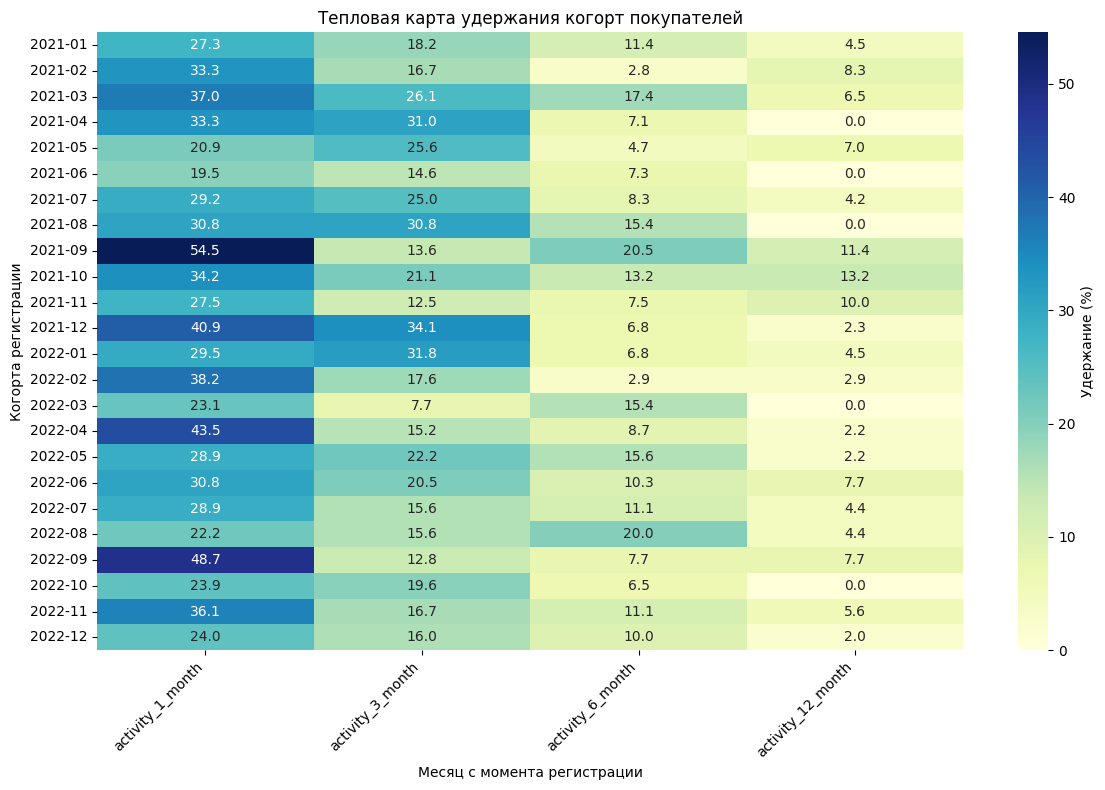

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Удержание (%)'})
plt.title('Тепловая карта удержания когорт покупателей')
plt.xlabel('Месяц с момента регистрации')
plt.ylabel('Когорта регистрации')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Интерпретация результатов

### Подзадача:
Проанализировать тепловую карту для выявления тенденций в удержании и спада активности покупателей и продавцов.


## Резюме:

### Основные результаты анализа данных

* Анализ выявил значительное снижение активности пользователей после первого месяца для всех когорт регистрации.
* Удержание пользователей продолжает последовательно снижаться со временем для всех когорт, с очень низким уровнем удержания после 6 месяцев.
* Хотя существуют небольшие вариации в начальных показателях удержания между разными когортами, общая картина быстрого снижения активности остается неизменной для всех периодов регистрации.
* Общие показатели удержания низкие, что указывает на потенциальную проблему с поддержанием долгосрочного вовлечения пользователей на платформе как для покупателей, так и для продавцов.

### Выводы и дальнейшие шаги

* Исследовать причины резкого снижения активности после первого месяца во всех когортах. Это может включать анализ поведения пользователей в начальный период, процессов онбординга или раннего пользовательского опыта.
* Исследовать стратегии улучшения вовлеченности и удержания пользователей в последующие месяцы, возможно, сосредоточившись на целевой коммуникации, улучшении функций или программах стимулирования для пользователей, которые находятся на платформе более длительный срок.

In [25]:
import pandas as pd

# Предположим, что файл называется 'data.csv' и находится в корневой директории
# Замените 'data.csv' на реальное имя вашего файла, если оно отличается
try:
    df = pd.read_csv('/content/drive/MyDrive/ZEROCODER_Блок_курса_Метрики/9 Урок финальный/Данные по продавцам для построения когорт/sellers_cohort_analysis_data - sellers_cohort_analysis_data.csv')
    print("Данные успешно загружены.")
    print(df.head()) # Выводим первые 5 строк для проверки
except FileNotFoundError:
    print("Ошибка: Файл 'data.csv' не найден. Пожалуйста, убедитесь, что файл находится в правильной директории и имя файла указано верно.")
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")

Данные успешно загружены.
   seller_id registration_date  activity_1_month  activity_3_month  \
0          1        2021-03-23                 1                 0   
1          2        2022-11-30                 0                 0   
2          3        2021-11-17                 0                 1   
3          4        2021-09-06                 1                 1   
4          5        2021-01-04                 1                 1   

   activity_6_month  activity_12_month  
0                 0                  0  
1                 0                  1  
2                 0                  0  
3                 0                  0  
4                 0                  0  


In [26]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['registration_month'] = df['registration_date'].dt.to_period('M')
print(df.head())

   seller_id registration_date  activity_1_month  activity_3_month  \
0          1        2021-03-23                 1                 0   
1          2        2022-11-30                 0                 0   
2          3        2021-11-17                 0                 1   
3          4        2021-09-06                 1                 1   
4          5        2021-01-04                 1                 1   

   activity_6_month  activity_12_month registration_month  
0                 0                  0            2021-03  
1                 0                  1            2022-11  
2                 0                  0            2021-11  
3                 0                  0            2021-09  
4                 0                  0            2021-01  


## Определение когорты для продавцов

### Подзадача:
Присвоить каждому продавцу когорту на основе месяца и года их регистрации в данных по продавцам.

**Обоснование**:

Назначьте месяц регистрации в качестве когорты для каждого продавца и отобразите обновленный фрейм данных.

In [27]:
df['cohort'] = df['registration_month']
print(df.head())

   seller_id registration_date  activity_1_month  activity_3_month  \
0          1        2021-03-23                 1                 0   
1          2        2022-11-30                 0                 0   
2          3        2021-11-17                 0                 1   
3          4        2021-09-06                 1                 1   
4          5        2021-01-04                 1                 1   

   activity_6_month  activity_12_month registration_month   cohort  
0                 0                  0            2021-03  2021-03  
1                 0                  1            2022-11  2022-11  
2                 0                  0            2021-11  2021-11  
3                 0                  0            2021-09  2021-09  
4                 0                  0            2021-01  2021-01  


## Расчет времени с момента регистрации для продавцов

### Подзадача:
Для каждого продавца и каждой точки активности (1, 3, 6, 12 месяцев) рассчитать количество месяцев, прошедших с момента регистрации.

**Обоснование**:

Преобразуйте столбец `registration_month` в тип datetime и вычислите даты активности и количество месяцев с момента регистрации для каждого столбца активности продавцов.

In [28]:
df['registration_month'] = pd.to_datetime(df['registration_month'].astype(str))

df['activity_1_month_date'] = df['registration_month'] + pd.DateOffset(months=1)
df['activity_3_month_date'] = df['registration_month'] + pd.DateOffset(months=3)
df['activity_6_month_date'] = df['registration_month'] + pd.DateOffset(months=6)
df['activity_12_month_date'] = df['registration_month'] + pd.DateOffset(months=12)

df['period_1_month'] = 1
df['period_3_month'] = 3
df['period_6_month'] = 6
df['period_12_month'] = 12

print(df.head())

   seller_id registration_date  activity_1_month  activity_3_month  \
0          1        2021-03-23                 1                 0   
1          2        2022-11-30                 0                 0   
2          3        2021-11-17                 0                 1   
3          4        2021-09-06                 1                 1   
4          5        2021-01-04                 1                 1   

   activity_6_month  activity_12_month registration_month   cohort  \
0                 0                  0         2021-03-01  2021-03   
1                 0                  1         2022-11-01  2022-11   
2                 0                  0         2021-11-01  2021-11   
3                 0                  0         2021-09-01  2021-09   
4                 0                  0         2021-01-01  2021-01   

  activity_1_month_date activity_3_month_date activity_6_month_date  \
0            2021-04-01            2021-06-01            2021-09-01   
1            202

## Формирование когортной таблицы для продавцов

### Подзадача:
Сгруппировать данные по когорте и месяцу с момента регистрации, подсчитывая количество активных продавцов в каждом периоде.

**Обоснование**:

Создайте список столбцов активности продавцов, сгруппируйте по когортам и просуммируйте активность за каждый период, затем объедините результаты в одну сводную таблицу для продавцов.

In [29]:
activity_cols = ['activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
cohort_activity_sellers = {}

for col in activity_cols:
    cohort_activity_sellers[col] = df.groupby('cohort')[col].sum()

cohort_activity_summary_sellers = pd.DataFrame(cohort_activity_sellers)
print("Сводная таблица активности когорт продавцов:")
display(cohort_activity_summary_sellers)

Сводная таблица активности когорт продавцов:


,activity_1_month,activity_3_month,activity_6_month,activity_12_month
cohort,,,,
2021-01,14,11,5,5
2021-02,5,5,4,5
2021-03,12,8,5,1
2021-04,12,16,8,2
2021-05,10,10,8,4
2021-06,14,11,10,4
2021-07,12,6,7,6
2021-08,15,13,5,5
2021-09,11,8,4,3


## Расчет удержания для продавцов

### Подзадача:
Преобразовать количество активных продавцов в процент удержания для каждой когорты по отношению к первоначальному размеру когорты продавцов.

**Обоснование**:

Рассчитайте начальный размер каждой когорты продавцов, а затем разделите количество активностей на начальный размер, чтобы получить процент удержания для продавцов.

In [30]:
cohort_sizes_sellers = df.groupby('cohort').size()

cohort_retention_sellers = cohort_activity_summary_sellers.divide(cohort_sizes_sellers, axis=0) * 100

print("\nТаблица удержания когорт продавцов (в %):")
display(cohort_retention_sellers)


Таблица удержания когорт продавцов (в %):


,activity_1_month,activity_3_month,activity_6_month,activity_12_month
cohort,,,,
2021-01,60.869565,47.826087,21.739130,21.739130
2021-02,35.714286,35.714286,28.571429,35.714286
2021-03,63.157895,42.105263,26.315789,5.263158
2021-04,48.000000,64.000000,32.000000,8.000000
2021-05,45.454545,45.454545,36.363636,18.181818
2021-06,58.333333,45.833333,41.666667,16.666667
2021-07,70.588235,35.294118,41.176471,35.294118
2021-08,65.217391,56.521739,21.739130,21.739130
2021-09,64.705882,47.058824,23.529412,17.647059


## Визуализация когортного анализа для продавцов

### Подзадача:
Построить тепловую карту для визуализации процентного удержания продавцов по когортам и периодам активности.

**Обоснование**:

Импортируйте необходимые библиотеки и создайте тепловую карту для визуализации процентов удержания когорт продавцов с аннотациями.

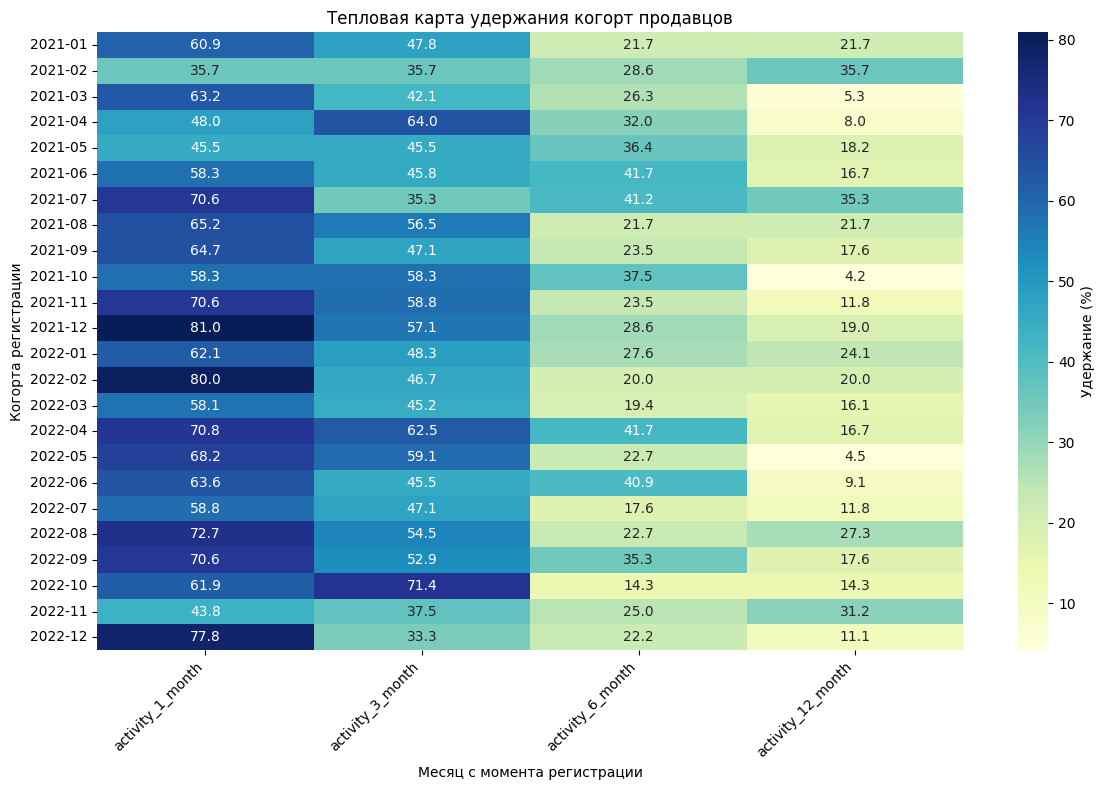

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention_sellers, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Удержание (%)'})
plt.title('Тепловая карта удержания когорт продавцов')
plt.xlabel('Месяц с момента регистрации')
plt.ylabel('Когорта регистрации')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
print("\nАнализ тепловой карты удержания когорт продавцов:")
print("-" * 50)

print("Основные наблюдения:")
print("- Начальный уровень активности (1 месяц) у большинства когорт продавцов относительно высокий, часто превышает 50%.")
print("- Происходит заметное снижение удержания к 3-му месяцу, и далее этот процент продолжает падать.")
print("- После 6 и 12 месяцев удержание продавцов становится довольно низким для большинства когорт.")
print("- У некоторых когорт наблюдаются небольшие \"всплески\" активности в более поздние периоды (например, когорта 2021-02 на 12 месяце), но общая тенденция к снижению сохраняется.")
print("- Нет ярко выраженных когорт, которые демонстрировали бы значительно лучшее удержание по сравнению с другими, что может указывать на системные проблемы, а не на специфику отдельных периодов.")

print("\nВыводы:")
print("- Как и у покупателей, у продавцов наблюдается проблема с долгосрочным удержанием.")
print("- Резкое снижение активности после первых месяцев требует более детального изучения причин ухода продавцов.")
print("- Необходимо разработать стратегии для повышения вовлеченности и стимулирования активности продавцов после начального периода.")
print("- Сравнение с удержанием покупателей показывает, что удержание продавцов, как правило, выше на начальных этапах, но также значительно снижается со временем.")


Анализ тепловой карты удержания когорт продавцов:
--------------------------------------------------
Основные наблюдения:
- Начальный уровень активности (1 месяц) у большинства когорт продавцов относительно высокий, часто превышает 50%.
- Происходит заметное снижение удержания к 3-му месяцу, и далее этот процент продолжает падать.
- После 6 и 12 месяцев удержание продавцов становится довольно низким для большинства когорт.
- У некоторых когорт наблюдаются небольшие "всплески" активности в более поздние периоды (например, когорта 2021-02 на 12 месяце), но общая тенденция к снижению сохраняется.
- Нет ярко выраженных когорт, которые демонстрировали бы значительно лучшее удержание по сравнению с другими, что может указывать на системные проблемы, а не на специфику отдельных периодов.

Выводы:
- Как и у покупателей, у продавцов наблюдается проблема с долгосрочным удержанием.
- Резкое снижение активности после первых месяцев требует более детального изучения причин ухода продавцов.
- Необх